# Basismodul Computerlinguistik
### Übung


Yannick Kaiser \
Y.Kaiser@campus.lmu.de

### Heute

- Levenshtein-Abstände
- Wagner-Fischer
- Daciuk-Hausaufgabe

## Levenshtein-Abstände
Ein Distanzmaß für Worte

> Wie viele Editier-Operationen sind mindestens nötig, um aus einem Wort $w$ ein anderes Wort $u$ zu generieren?

### Operationen
Im Standardfall werden folgende 3 Operationen zugelassen:

- Einfügen:  $a$  ->  $ab$. Operation: [:$b$]
- Löschen: $ab$ -> $b$. Operation: [$a$:]
- Ersetzen: $ab$ -> $cb$. Operation: [$a$:$c$]

**Beispiele:**

Dieb -- 1 --> Die [$\text{b}$:] \
Tanne -- 1 --> Tannen [:$\text{n}$] \
der -- 1 --> dem [$\text{r}$:$\text{m}$] \
Abend -- 2 --> Aber [$\text{n}$:$\text{r}$], [$\text{r}$:] \
Pferd -- 8 --> Herdplatte [$\text{P}$:], [$\text{f}$:$\text{H}$], [:$\text{p}$], [:$\text{p}$], [:$\text{l}$], [:$\text{t}$], [:$\text{t}$], [:$\text{e}$]

### Operationen mit Gewichten
Operationen können Gewichte, bzw. Kosten, zugeordnet bekommen, sodass bestimmte Operationen unterschiedlich stark zum Wortabstand beitragen. Eine Kostenfunktion 'c' bildet Operationen auf ihre Kosten ab.

c($\text{f}$:$\text{s}$) = 1 \
c(:$\text{x}$) = 2 \
c($\text{a}$:) = 12

d("an","n") = 12


### Zusätzliche Operationen

Je nach Anwendungsfall (Textkorrektur, Wortvorschläger auf Handytastatur, ...) können andere Operationen hinzugenommen werden, z.B.:

- Vertauschen: $ab$  ->  $ba$. Operation: [$ab$:$ba$]
- Kollabieren: $aaaa$ -> $a$. Operation: [$a$+:$a$]
- ...

Worteditierabstände werden heute oft allem verwendet, um ähnliche Wörter als **Vorschläge** für Korrekturen oder Eingaben zu liefern, oder um eine **unscharfe Suche** zu realisieren.

## Der Wagner-Fischer-Algorithmus
> ...zur Berechnung des minimalen Editierabstandes zweier Wörter

Der Wagner-Fischer-Algorithmus nutzt **dynamische Programmierung**, um den Levenshtein-Abstand zweier Wörter auszurechnen, indem nach und nach die Abstände zwischen allen Kombinationen von **Präfixen** der Wörter berechnet werden.

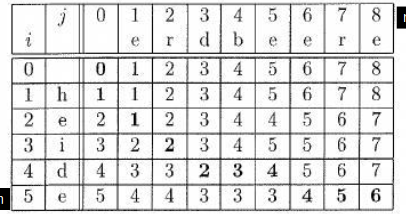

Jedes Feld der **Matrix** bezeichnet den Editierabstand zwischen den Präfixen der Länge $i$, bzw. $j$, der beiden Wörter. \
Die erste Zeile bzw. erste Spalte steht jeweils für den leeren Präfix der Länge 0.

Der Inhalt der ersten **Zeile** und **Spalte** der Matrix kann direkt angegeben werden: \
Um das leere Wort zu einem nicht-leeren Wort zu machen müssen genau so viele Einfüge-Operationen getätigt werden, wie das Wort Buchstaben hat - und analog auch für das Löschen, um ein leeres Wort zu erhalten.

Alle weiteren Felder der Matrix berechnen sich aus den 3 **linken** und **oberen** Nachbarn der Felder:
- Horizontal wird eine Einfügen-Operation simuliert
- Vertikal wird eine Löschen-Operation simuliert
- Diagonal wird eine Ersetzen-Operation simuliert

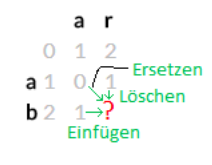

**Hinweis:** Die Richtungen von Löschen und Einfügen hängen **nur** davon ab, wie die Matrix interpretiert wird. Ob der Abstand vom horizontalen zum vertikalen Präfix berechnet wird, oder umgekehrt. Oder mit anderen Worten: Die Matrix kann 'gekippt werden'.

- **Einfügen**-Operationen kosten immer c(:x)
- **Löschen**-Operationen kosten immer c(x:)
- **Ersetzen**-Operationen kosten c(x:y) falls x != y, **sonst 0**.

Für den 'normalen' Levenshtein-Abstand mit c(..) = 1 ergibt sich:

- **Einfügen**-Operationen kosten immer **1**
- **Löschen**-Operationen kosten immer **1**
- **Ersetzen**-Operationen kosten **1** falls x != y, **sonst 0**.

Für ein freies Feld der Matrix werden nun 3 **Kandidaten** berechnet:
- $\text{Resultierende Kosten bei Einfügen }=\text{ Linker Nachbar }+ 1$
- $\text{Resultierende Kosten bei Löschen }=\text{ Oberer Nachbar }+ 1$
- $\text{Resultierende Kosten bei Ersetzen }=\text{ Diagonaler Nachbar }+ 1\text{ oder }+ 0\text{, falls die Buchstaben gleich sind.}$

Das Feld erhält den **minimalen** Wert der Kandidaten.

Auf diese Weise kann nun zeilen- oder spaltenweise die Matrix aufgefüllt werden. Bereits berechnete Felder spielen bei der Berechnung von 3 neuen Feldern eine Rolle: Aber weil durch die Matrix das Ergebnis gespeichert wurde, muss die Rechnung nur einmal ausgeführt werden! Ohne dieses Speichern der Präfix-Abstände würde ein rekursiver Aufruf für die ganzen Wörter diese Teilergebnisse sehr oft neu berechnen müssen.

Das Ergebnis in der **unteren, rechten Ecke** der Matrix ist der Editierabstand zwischen den beiden Wörtern:

$\text{d}(\text{heide,erdbeere}) = 6 = \text{Matrix}[\text{len(heide)}][\text{len(erdbeere)}]$